# **Airline Sentiment Analysis (NLP with RNN)**

https://www.kaggle.com/code/chibuzorokocha/airline-sentiment-analysis-90-accuracy-using-rnn


**Airline Sentiment Analysi**s is a natural language processing (NLP) task that involves identifying the sentiment expressed in a piece of text about an airline. Recurrent Neural Networks (RNNs) are a type of neural network that are particularly well-suited to modeling sequences of data, such as natural language text. In this task, we can use RNNs to classify tweets about airlines into positive, negative or neutral categories.


**Here are the steps in detail:**

**Data Preprocessing:**
We start by importing the necessary libraries for data cleaning and tokenization, such as NLTK and spaCy. We then load the airline tweets dataset and perform some initial data exploration. We can also remove any irrelevant or noisy data such as tweets that contain links or mentions of other Twitter users. After that, we perform text cleaning by removing stop words, special characters, and other noise from the text data. Finally, we tokenize the text data and convert it into numerical format for feature extraction.

**Feature Extraction:**
We can extract features from the tokenized text data using techniques such as Word2Vec or GloVe. These methods convert the text data into fixed-length vectors that can be fed into the RNN model. We can also use techniques such as tf-idf or bag-of-words to represent the text data.

**Model Building:**
We can build a Recurrent Neural Network (RNN) model to classify the sentiment of the airline tweets. We can use architectures such as Long Short-Term Memory (LSTM) or Gated Recurrent Units (GRU) to model the sequence of the text data. We can also use techniques such as dropout and batch normalization to regularize the model and prevent overfitting.

**Model Training:**
We can train the RNN model on the preprocessed and feature-extracted data. We can use techniques such as cross-validation to evaluate the model's performance. We can also use techniques such as early stopping to prevent the model from overfitting the training data.

**Model Testing:**
We can test the trained model on new, unseen data to evaluate its performance. We can use metrics such as accuracy, precision, recall, and F1 score to evaluate the model's performance on the test data. We can also use techniques such as confusion matrix and ROC curve to analyze the model's performance in more detail.

In summary, building an airline sentiment analysis model using RNNs involves data preprocessing, feature extraction, model building, model training, and model testing. With the right techniques and tools, we can build a robust and accurate model that can classify the sentiment of airline tweets with high accuracy.

# **Import the Neccesary Libraries**

In [1]:
import re
import warnings
import itertools
import numpy as np 
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=FutureWarning)

# Reading the Dataset

In [2]:
data = pd.read_csv("airline_tweets.csv")
df = data[["text", "airline_sentiment"]].copy()  # Create a copy to avoid any issues
df.loc[:, 'text'] = df['text'].map(lambda x: x.lstrip('@VirginAmerica@UnitedAir@Southwestairline@DeltaAir@USAirways@American').rstrip('@'))

In [3]:
df

,text,airline_sentiment
0,What @dhepburn said.,neutral
1,plus you've added commercials to the experien...,positive
2,I didn't today... Must mean I need to take an...,neutral
3,"it's really aggressive to blast obnoxious ""en...",negative
4,and it's a really big bad thing about it,negative
...,...,...
14635,thank you we got on a different flight to Chi...,positive
14636,leaving over 20 minutes Late Flight. No warni...,negative
14637,Please bring American Airlines to #BlackBerry10,neutral
14638,"you have my money, you change my flight, and ...",negative


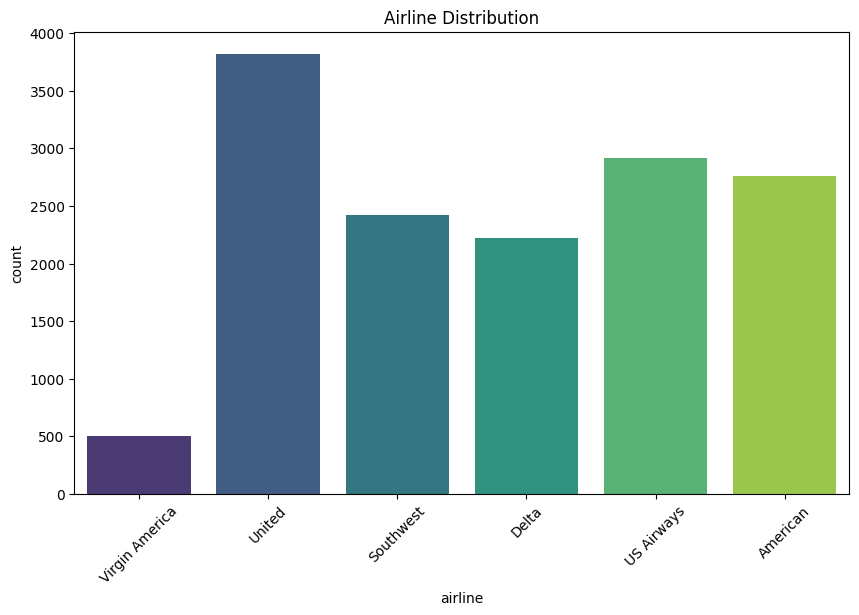

In [4]:
# sns.countplot(data.airline);

plt.figure(figsize=(10,6))
sns.countplot(x='airline', data=data, palette='viridis')  # <-- added palette
plt.title('Airline Distribution')
plt.xticks(rotation=45)
plt.show()

In [5]:
df = df[df.airline_sentiment!="neutral"] # To remove neutral responses
df['text'] = df['text'].apply(lambda x: x.lower()) # To lower 
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only

C:\Users\hi\AppData\Local\Temp\ipykernel_3076\1447107429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower()) # To lower
C:\Users\hi\AppData\Local\Temp\ipykernel_3076\1447107429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x))) # To keep numbers and strings only


In [6]:
df.head(5) #Quick Look 

,text,airline_sentiment
1,plus youve added commercials to the experienc...,positive
3,its really aggressive to blast obnoxious ente...,negative
4,and its a really big bad thing about it,negative
5,seriously would pay 30 a flight for seats tha...,negative
6,yes nearly every time i fly vx this ear worm ...,positive


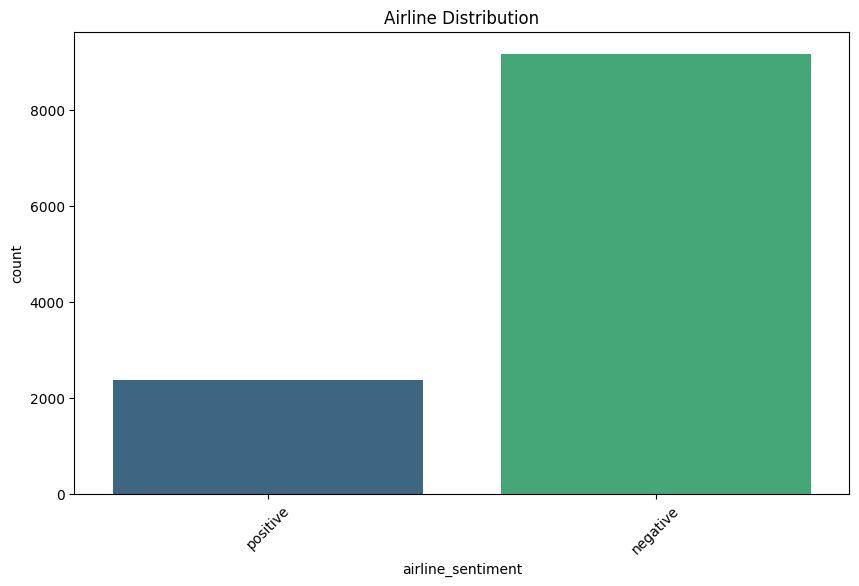

In [7]:
# sns.countplot(df.airline_sentiment);#Mostly Negative Reviews(Class Imbalance found) 


plt.figure(figsize=(10,6))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')  # <-- added palette
plt.title('Airline Distribution')
plt.xticks(rotation=45)
plt.show()

This next line of code drops the first 5000 rows where the value of the "airline_sentiment" column is "negative" from a pandas DataFrame called "df", due to unequal amount of negatives to positives

In summary, the code drops the first 5000 rows where the value of the "airline_sentiment" column is "negative" from the original DataFrame "df" and returns a new DataFrame without those rows.

In [8]:
df = df.drop(df[df.airline_sentiment == "negative"].iloc[:5000].index)

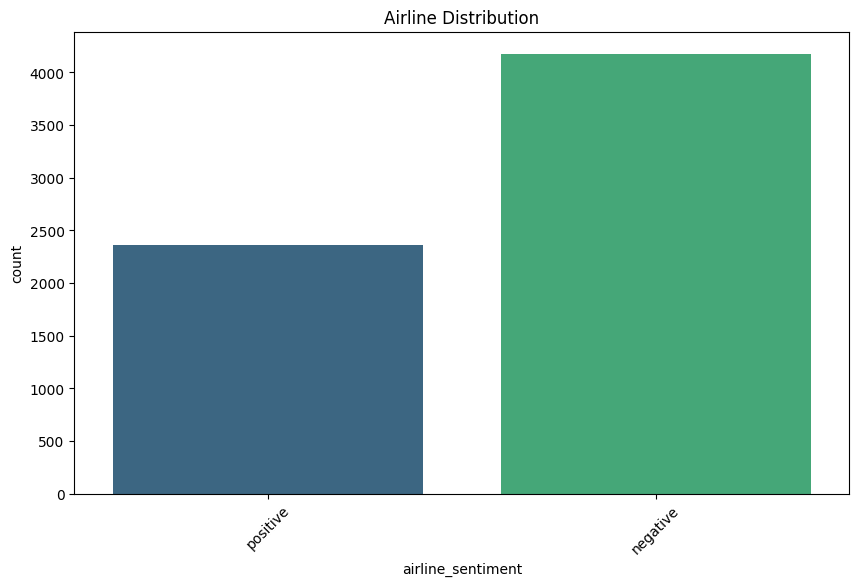

In [9]:
# sns.countplot(df.airline_sentiment);


plt.figure(figsize=(10,6))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')  # <-- added palette
plt.title('Airline Distribution')
plt.xticks(rotation=45)
plt.show()

This code snippet uses the Keras Tokenizer and pad_sequences functions to preprocess text data. Specifically, it tokenizes the text data by splitting the text into individual words and then maps these words to integers. The maximum number of unique words to be considered is set to 4000 using the max_features parameter of the Tokenizer function.

After the text is tokenized, the pad_sequences function is used to ensure that all sequences have the same length by adding padding to the beginning or end of the sequences as needed. The resulting X variable is a two-dimensional numpy array where each row represents a sequence of integers corresponding to the words in the original text.

Overall, this code prepares the text data for use in a machine learning model by converting it into a format that can be easily processed by the model.

In [10]:
# Tokenizing
max_features = 4000   # (typo fixed: max_fatures -> max_features)
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)

y = df['airline_sentiment'].map({"negative": 0, "positive": 1}).values

**Train Test Split**

In [11]:
# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
            test_size=0.3, 
            shuffle=True,
            stratify=y,
            random_state=1
)


# Defining the Model

In [12]:
# Model
embed_dim = 128
lstm_out = 196

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(lstm_out, dropout=0.3, recurrent_dropout=0.3))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation='softmax'))  # 2 classes: negative, positive

# Compile
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"]
)


c:\Users\hi\Desktop\projects\python_projects\tutorial\tut_tensorflow\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the Model

In [14]:
import time
EPOCHS = 20

# Time Tracking Callback
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.times = []
    
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()
    
    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_time_start)

# Create callbacks
time_callback = TimeHistory()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',    # Monitor validation accuracy
    patience=5,                # Stop after 5 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
)

# Train
history = model.fit(
    X_train, 
    Y_train,
    epochs=EPOCHS,
    batch_size=32,
    validation_split=0.2,
    verbose=2,
    callbacks=[time_callback, early_stopping]
)

# After training
print("\nTime per epoch (in seconds):", time_callback.times)

total_time_min = sum(time_callback.times) / 60
print(f"Total training time: {total_time_min:.2f} minutes")


Epoch 1/20
115/115 - 14s - 119ms/step - accuracy: 0.7581 - loss: 0.4932 - val_accuracy: 0.8515 - val_loss: 0.3364
Epoch 2/20
115/115 - 6s - 56ms/step - accuracy: 0.8965 - loss: 0.2605 - val_accuracy: 0.9039 - val_loss: 0.2442
Epoch 3/20
115/115 - 6s - 55ms/step - accuracy: 0.9372 - loss: 0.1638 - val_accuracy: 0.9203 - val_loss: 0.2241
Epoch 4/20
115/115 - 6s - 54ms/step - accuracy: 0.9588 - loss: 0.1171 - val_accuracy: 0.9105 - val_loss: 0.2362
Epoch 5/20
115/115 - 6s - 56ms/step - accuracy: 0.9732 - loss: 0.0803 - val_accuracy: 0.9159 - val_loss: 0.2625
Epoch 6/20
115/115 - 6s - 55ms/step - accuracy: 0.9787 - loss: 0.0684 - val_accuracy: 0.9017 - val_loss: 0.2755
Epoch 7/20
115/115 - 10s - 89ms/step - accuracy: 0.9798 - loss: 0.0543 - val_accuracy: 0.9159 - val_loss: 0.3305
Epoch 8/20
115/115 - 7s - 57ms/step - accuracy: 0.9836 - loss: 0.0495 - val_accuracy: 0.9050 - val_loss: 0.3983

Time per epoch (in seconds): [13.662267446517944, 6.402271509170532, 6.28094744682312, 6.18506336212

In [15]:
score = model.evaluate(X_test, Y_test, verbose=False)
print("loss = ",score[0])
print("accuracy = ",score[1])

loss =  0.22437028586864471
accuracy =  0.9118695855140686


**Ploting the confusion matrix**

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step  


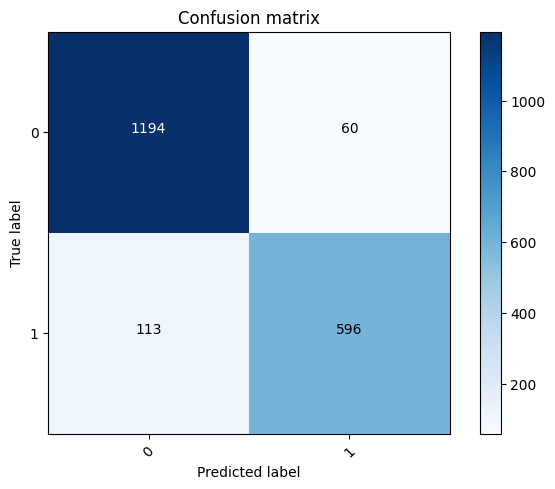

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
confusion_mtx = confusion_matrix(Y_test, y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(2)) 

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
[[95.215311    4.784689  ]
 [15.93794076 84.06205924]]
####################


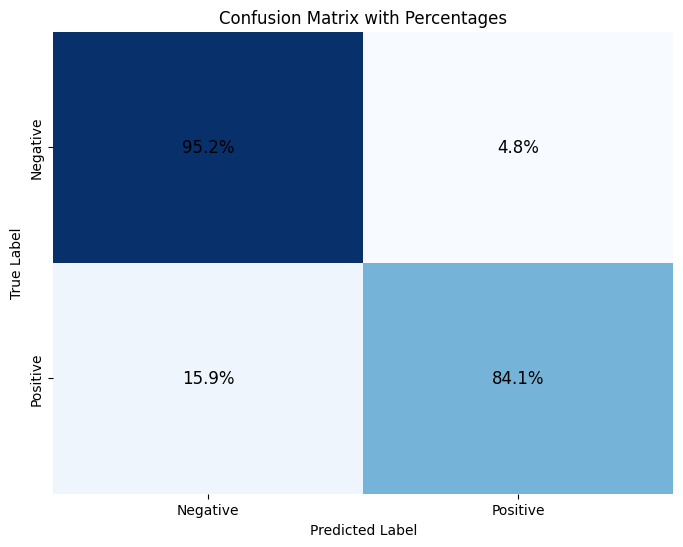

In [17]:
# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
confusion_mtx = confusion_matrix(Y_test, y_pred_classes)

# Calculate percentage values
cm_percent = confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis] * 100
print(cm_percent)
print("####################")

# Plot confusion matrix with percentages
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mtx, annot=False, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add percentage annotations
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{cm_percent[i, j]:.1f}%", 
                 ha='center', va='center', color='black', fontsize=12)

# Add labels and title
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix with Percentages')

# Show plot
plt.show()


# Model Test

In [18]:
sample = ['Meetings: Air crew is so dumb.']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0 2030  237  147
    11   40 2049]]
1/1 - 0s - 52ms/step
negative


In [19]:
sample = ['Air crew was nice and pleasant experience.']
sample = tokenizer.texts_to_sequences(sample)
sample = pad_sequences(sample, maxlen=31, dtype='int32', value=0)
print(sample)
sentiment = model.predict(sample,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0  237  147   17  220
     7 1122  165]]
1/1 - 0s - 51ms/step
positive
